In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.shape

(303, 14)

In [10]:
x = heart.iloc[::,:13]
y = heart.iloc[::,13:]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.8,random_state = 0)

In [22]:
lm = LogisticRegression()
lm.fit(x_train,y_train)
pred = lm.predict(x_test)
cm = confusion_matrix(pred,y_test)
accu = accuracy_score(pred,y_test)
print(cm)
print(accu)

[[ 79  15]
 [ 29 120]]
0.8189300411522634


# ROC

In [25]:
print('coefficient',lm.coef_)
print('intercept', lm.intercept_)

coefficient [[-0.01142702 -1.56974676  0.7493488  -0.00908077 -0.01139538 -0.23733376
   0.07914789  0.04904846 -0.48811762 -0.33381728  0.09580707 -0.78892245
  -0.58091773]]
intercept [0.05134507]


In [33]:
prabability = lm.predict_proba(x_test)
prabability

array([[0.92458871, 0.07541129],
       [0.16477682, 0.83522318],
       [0.21167731, 0.78832269],
       [0.96165272, 0.03834728],
       [0.87162176, 0.12837824],
       [0.49676497, 0.50323503],
       [0.88978729, 0.11021271],
       [0.88145912, 0.11854088],
       [0.98948588, 0.01051412],
       [0.99739863, 0.00260137],
       [0.07933664, 0.92066336],
       [0.08711441, 0.91288559],
       [0.97133215, 0.02866785],
       [0.14738325, 0.85261675],
       [0.02603132, 0.97396868],
       [0.2501117 , 0.7498883 ],
       [0.93387555, 0.06612445],
       [0.2180291 , 0.7819709 ],
       [0.99678905, 0.00321095],
       [0.04638938, 0.95361062],
       [0.11977619, 0.88022381],
       [0.65311729, 0.34688271],
       [0.97392976, 0.02607024],
       [0.92605619, 0.07394381],
       [0.15459848, 0.84540152],
       [0.79175216, 0.20824784],
       [0.69147763, 0.30852237],
       [0.67401527, 0.32598473],
       [0.02161018, 0.97838982],
       [0.28250827, 0.71749173],
       [0.

In [38]:
probability_positive = prabability[:,1]

In [42]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,probability_positive)

In [46]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.8943072702331961

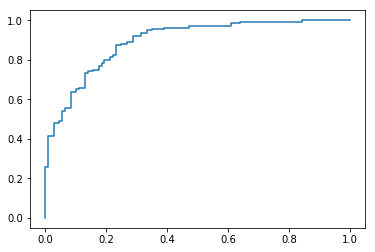

In [48]:
from matplotlib import pyplot as plt
plt.plot(fpr,tpr,label = 'AUC= %0.2f' % roc_auc)

# LogisticRegression with StandardScaler

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_in = x
x_scaled = sc.fit_transform(x_in)
x_input = pd.DataFrame(x_scaled)

In [18]:
x_train1,x_test1,y_train,y_test = train_test_split(x_input,y,test_size = 0.8, random_state = 0)

In [19]:
lm1 = LogisticRegression()
lm1.fit(x_train1,y_train)
pred1 = lm1.predict(x_test1)
cm1 = confusion_matrix(pred1,y_test)
accu1 = accuracy_score(pred1,y_test)
print(cm1)
print(accu1)

[[ 79  21]
 [ 29 114]]
0.7942386831275721
